# RUN WITH footfall_ml_spatial 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
import branca.colormap as cm
import matplotlib.colors as colors
import contextily as cx

def create_other_features_gdf(fp):
    df = pd.read_csv(fp)
    geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

n_clusters=5

### Read in sensor data

In [2]:
melbourne_sensors = pd.read_csv("../Data/FootfallData/melbourne_locations.csv")
melbourne_sensors.rename(columns={'sensor_description': 'Name'}, inplace = True)
melbourne_sensors = melbourne_sensors.drop_duplicates('sensor_id', keep='first')

In [3]:
sensors_dates_covered = pd.read_csv("../Cleaned_data/SensorData/sensors_dates_covered.csv")

In [4]:
melbourne_sensors = pd.merge(melbourne_sensors, sensors_dates_covered, on='sensor_id',  how='left')
melbourne_sensors2 = melbourne_sensors[melbourne_sensors['Start'].notna()]

### Run K Means clustering

In [5]:
test = melbourne_sensors[['Latitude','Longitude']].copy()
# Initialize KMeans instance
kmeans = KMeans(n_clusters=n_clusters)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(test)
# Add columns
test["k5cls"] = k5cls.labels_

In [6]:
# test.groupby('k5cls').count()

In [7]:

# # Plot the basic map        
# f = folium.Figure(width=800, height=600)
# melbourne_map = folium.Map(location=[-37.81426902667574, 144.97034862684487], zoom_start=13, control_scale=True,
#                            tiles='cartodbpositron',
#                            min_zoom = 10).add_to(f)


# bus_stops_fg=folium.FeatureGroup(name='Bus Stops', show=False)
# melbourne_map.add_child(bus_stops_fg)
# for index, location_info in test.iterrows():
#     folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]], radius=7, fill = True,
#                         color= linear(location_info['k5cls']),fill_color=linear(location_info['k5cls']),
#                         fill_opacity=1).add_to(bus_stops_fg)    
    
# melbourne_map    

In [8]:
color = []
n = n_clusters
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))   

### Plot

In [11]:
geometry = [Point(xy) for xy in zip(test.Longitude, test.Latitude)]
gdf = gpd.GeoDataFrame(test, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')
colors_ls = ['black'] * n_clusters

# fig, axs = plt.subplots(2,5,figsize=(40,40))
# for num, ax in enumerate(axs.flatten()):
#     if num <n_clusters:
#         colors_ls[num] = 'blue'
#         gdf.plot(column=gdf.k5cls, ax = ax, markersize = 80, cmap=colors.ListedColormap(colors_ls))
#         cx.add_basemap(ax = ax)
#         ax.axis('off')
#         colors_ls[num] = 'black';
# #     else:
# #        ax.set_axis_off()
        
# fig.subplots_adjust(hspace=-0.75, wspace=0.05)     

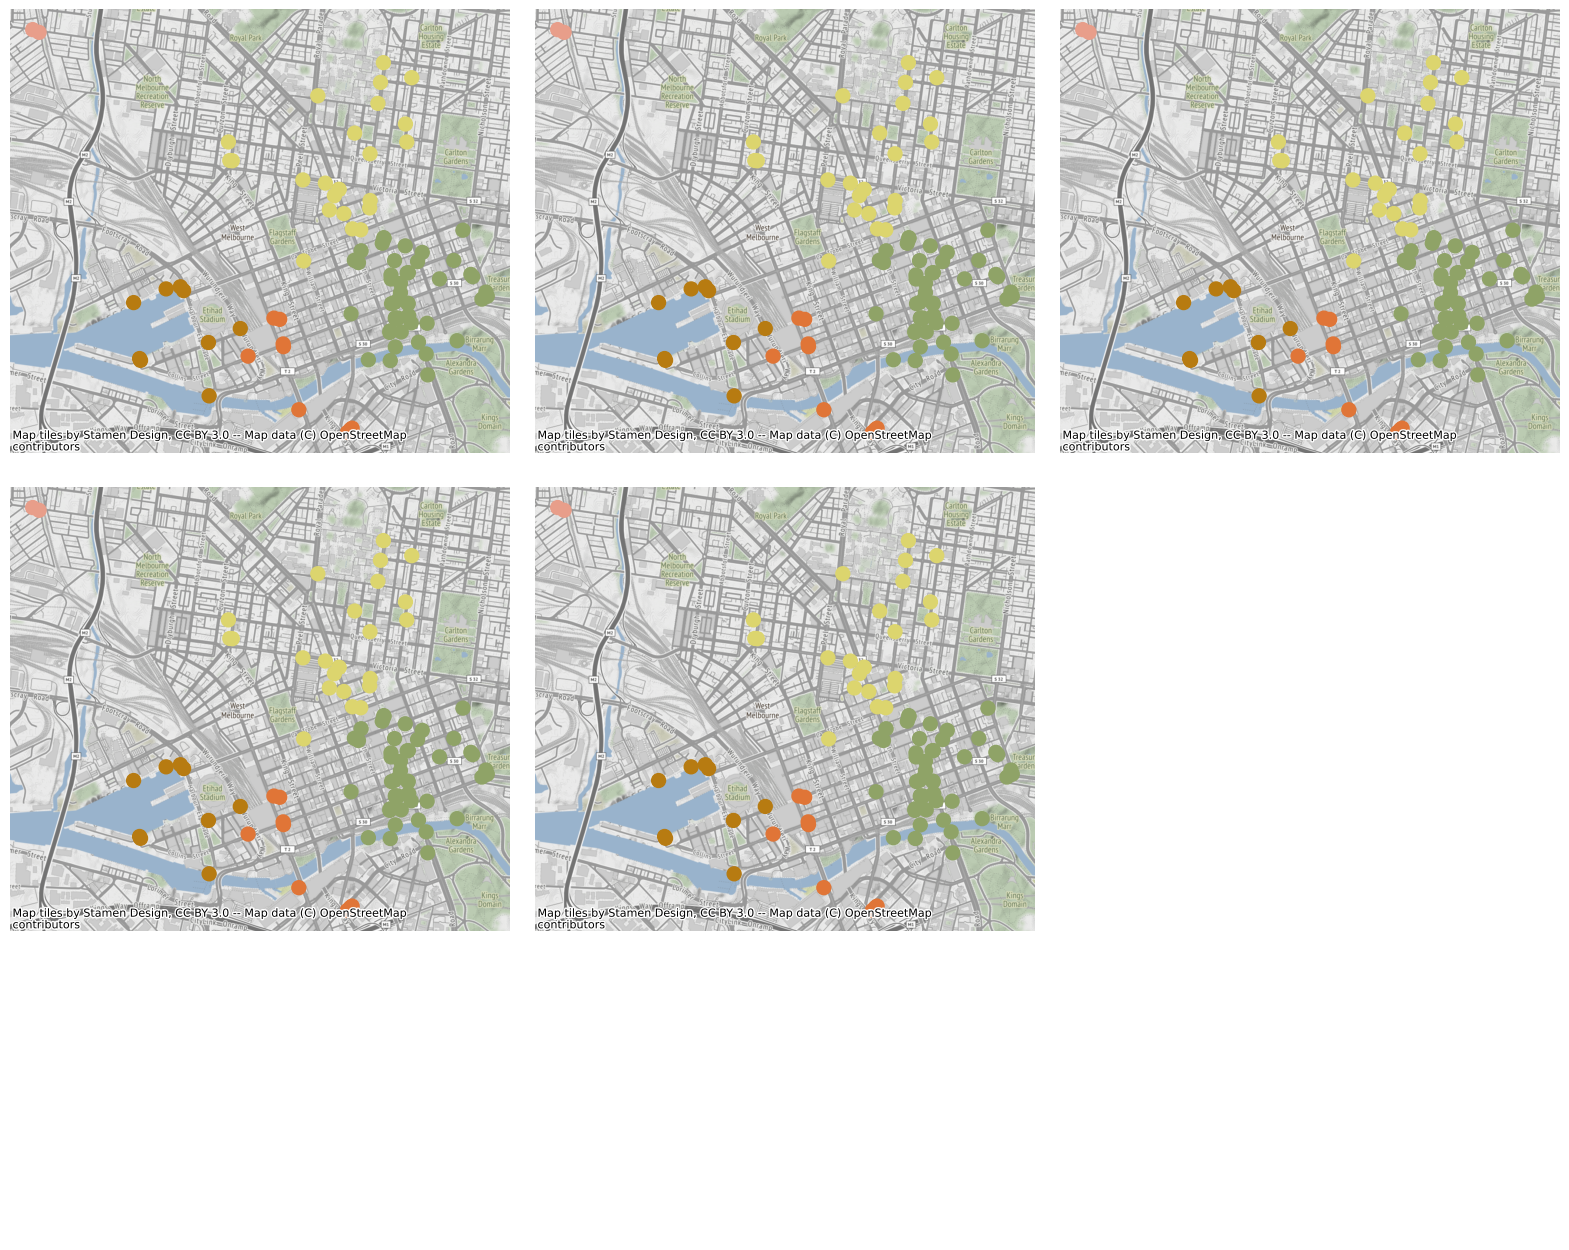

In [12]:
geometry = [Point(xy) for xy in zip(test.Longitude, test.Latitude)]
gdf = gpd.GeoDataFrame(test, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

import matplotlib.colors as colors
# fig, axs = plt.subplots(2,5,figsize=(40,40))
fig, axs = plt.subplots(2,3,figsize=(20,20))
for num, ax in enumerate(axs.flatten()):
    if num <n_clusters:
        colors_ls[num] = 'blue'
        gdf.plot(column=gdf.k5cls, ax = ax, markersize = 100, cmap=colors.ListedColormap(color))
#         gdf.plot(column=gdf.k5cls, ax = ax, markersize = 200, cmap=colors.ListedColormap(color))
        cx.add_basemap(ax = ax)
        ax.axis('off')
        colors_ls[num] = 'black';
    else:
        ax.set_axis_off()

fig.subplots_adjust(hspace=-0.55, wspace=0.05)     

In [13]:
color = []
n = n_clusters
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))   

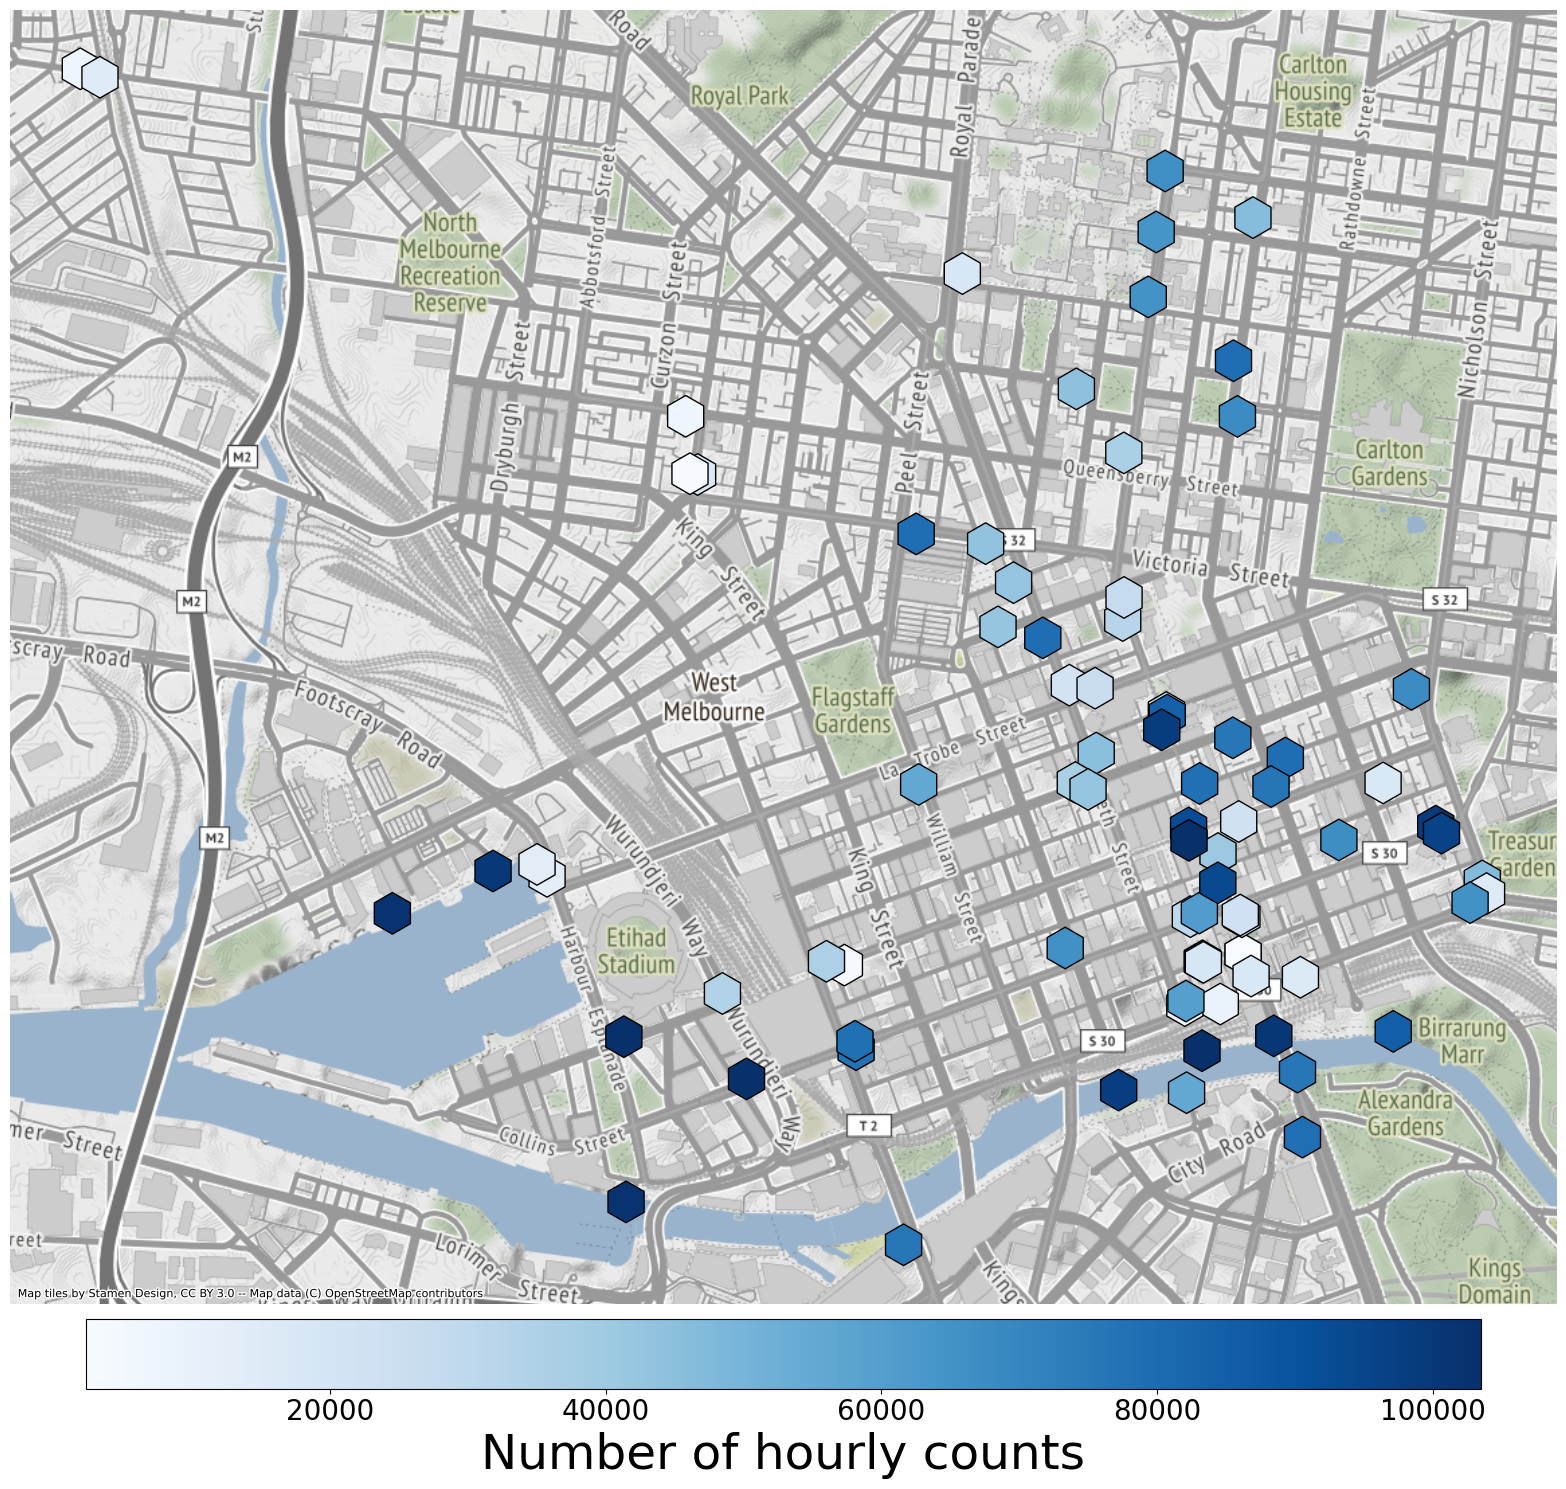

In [59]:
geometry = [Point(xy) for xy in zip(melbourne_sensors.Longitude, melbourne_sensors.Latitude)]
gdf = gpd.GeoDataFrame(melbourne_sensors, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

geometry = [Point(xy) for xy in zip(melbourne_sensors2.Longitude, melbourne_sensors2.Latitude)]
gdf2 = gpd.GeoDataFrame(melbourne_sensors2, geometry=geometry)
gdf2 = gdf2.set_crs('EPSG:4326')
gdf2 = gdf2.to_crs('epsg:3857')

fig, ax = plt.subplots(figsize=(20,20))
# gdf.plot(ax = ax, markersize = 300,color='black')
gdf.plot(column=gdf.Values_per_sensor, ax = ax, markersize = 900,edgecolor = 'black', cmap='Blues', marker='h', legend = True, 
         legend_kwds={'shrink': 0.9, 'pad':0.01, 'label':'Number of hourly counts', 
                      "orientation": "horizontal"
#                       "rotation" :90
                     })

# Change font size on legend
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 35}) # legend title size

# gdf2.plot(ax = ax, markersize = 300,color='green')
cx.add_basemap(ax,  url = cx.providers.OpenTopoMap)    
ax.axis('off')
ax.set_axis_off()
# plt.rc('legend',fontsize=500) # using a size in points

fig.savefig("SensorLocations.PNG", bbox_inches="tight" )

In [84]:

# # Plot the basic map        
# f = folium.Figure(width=800, height=600)
# melbourne_map = folium.Map(location=[-37.81426902667574, 144.97034862684487], zoom_start=13, control_scale=True,
#                            tiles='cartodbpositron',
#                            min_zoom = 10).add_to(f)


# bus_stops_fg=folium.FeatureGroup(name='Bus Stops', show=False)
# melbourne_map.add_child(bus_stops_fg)
# for index, location_info in melbourne_sensors2.iterrows():
#     folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]], radius=7, fill = True,
#                         color= 'black',fill_color='black',popup=location_info["sensor_id"],
#                         fill_opacity=1).add_to(bus_stops_fg)    
    
# melbourne_map    